In [146]:
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
! pip install ipywidgets
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
# import matplotlib.dates as mdates
# from matplotlib.dates import DateFormatter
# import pylab as pl
# import numpy as np
import matplotlib.dates as dates
mpl.style.use(['ggplot']) # optional: for ggplot-like style
covid_df = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv")
# from IPython.display import display
# from IPython.html import widgets 
# from IPython.display import display
# from ipywidgets import interact, interactive, fixed, interact_manual


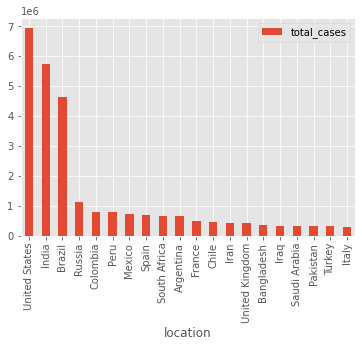

In [54]:
# Comparison of total cases to date
covid_total_cases_group = covid_df[["location","total_cases"]].groupby("location",
                                           axis=0,
                                        sort = False).max()
covid_total_cases_group = covid_total_cases_group.sort_values("total_cases",ascending = False)
covid_total_cases_group = covid_total_cases_group.drop("World", axis = 0)
covid_total_cases_group.head()


covid_total_cases_group[0:20].plot(kind = "bar")
                                  
 

In [21]:
def country_stats(name):
    country_df = covid_df[covid_df["location"].str.contains(name)]
    country_df = pd.country_df.sort_values(by="date",ascending=True)

In [164]:
def countrys_stats(name):
    
    country_df = covid_df[covid_df["location"].str.contains(name)]
    country_df["date"] = pd.to_datetime(country_df["date"], format = "%Y/%m/%d")
    country_df_total = country_df[["date","total_cases"]].sort_values(by="date",ascending=True)
    country_df_new = country_df[["date","new_cases"]].sort_values(by="date",ascending=True)


    fig,axs = plt.subplots(1,2,figsize=(20,7))
    fig.suptitle(name)

    axs[0].plot_date(country_df_total["date"],
                  country_df_total["total_cases"],
                  "b-",
                  xdate=True)

    axs[1].plot_date(country_df_new["date"],
                     country_df_new["new_cases"],
                     "b-",
                     xdate=True)

    axs[0].title.set_text("total cases")
    axs[0].xaxis.grid(True, which="minor")
    axs[0].yaxis.grid()
    axs[0].xaxis.set_major_locator(dates.MonthLocator())
    axs[0].xaxis.set_major_formatter(dates.DateFormatter('%b\n%Y'))

    axs[1].title.set_text("daily cases")
    axs[1].xaxis.grid(True, which="minor")
    axs[1].yaxis.grid()
    axs[1].xaxis.set_major_locator(dates.MonthLocator())
    axs[1].xaxis.set_major_formatter(dates.DateFormatter('%b\n%Y'))

    plt.show()
    

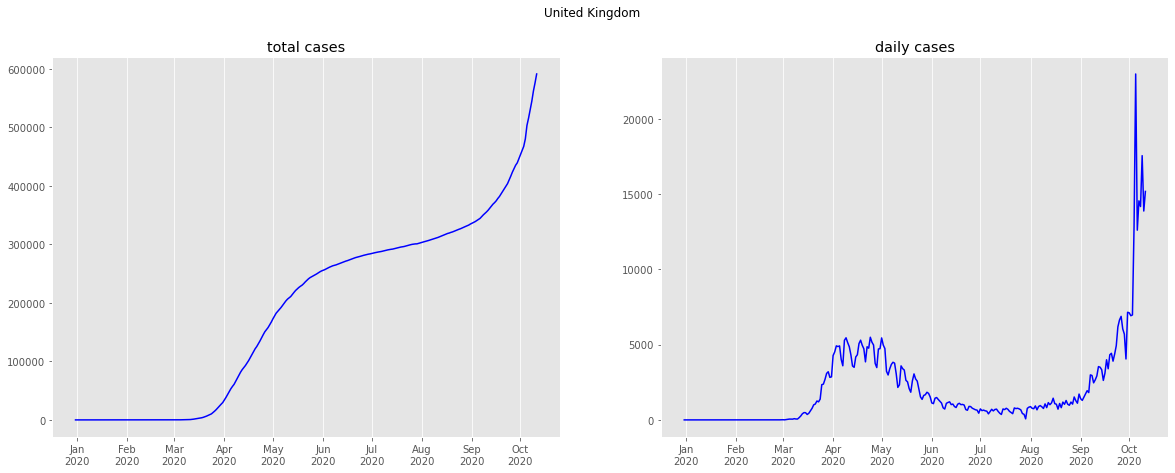

In [171]:
countrys_stats("United Kingdom")
